# 05 Simple Linear Regression

Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

Referensi: https://en.wikipedia.org/wiki/Simple_linear_regression

# Sample Dataset

In [1]:
import pandas as pd

pizza = {'diameter': [6, 8, 16, 14, 18], 
        'harga': [7, 9, 13, 17.5, 18]}
pizza_df= pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,16,13.0
3,14,17.5
4,18,18.0


# Visualisasi Data

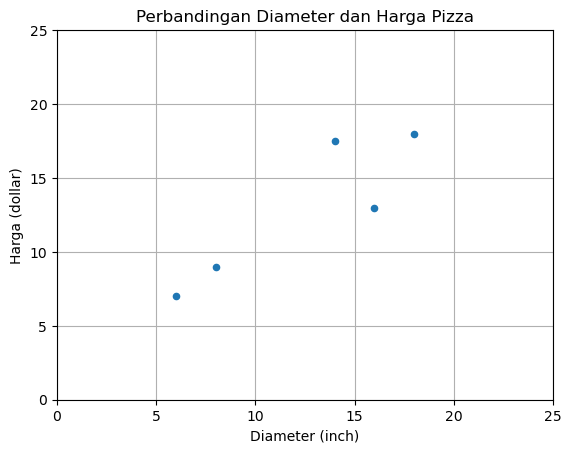

In [4]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

# Penyesuaian Dataset

In [5]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 16 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [6]:
x = X.reshape(-1, 1)
x.shape

(5, 1)

In [7]:
X

array([ 6,  8, 16, 14, 18], dtype=int64)

# Training Simple Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

X = np.array([6, 8, 16, 14, 18]).reshape(-1, 1)  
y = np.array([3, 5, 8, 7, 9]) 

model = LinearRegression()
model.fit(X, y)

LinearRegression()

# Visualisasi Simple Linear Regression Model

In [9]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

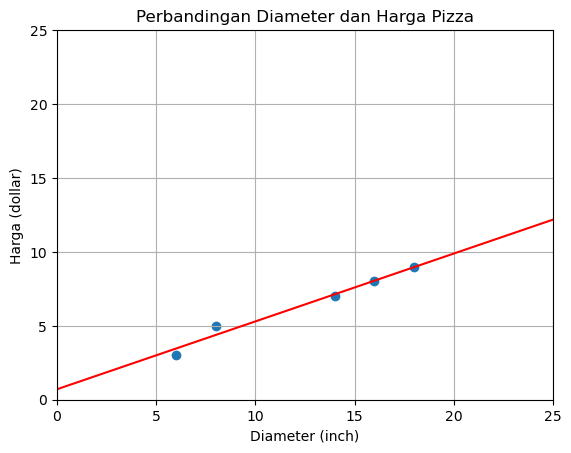

In [11]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r') 

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [12]:
print(f'intercept: {model.intercept_}') 
print(f'slope: {model.coef_}')

intercept: 0.7089552238805963
slope: [0.45895522]


# Mencari nilai slope

In [13]:
print(f'X:\n{X}\n')
print(f'x flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [16]
 [14]
 [18]]

x flatten: [ 6  8 16 14 18]

y: [3 5 8 7 9]


# Variance

In [14]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 26.8


# Covariance

In [15]:
np.cov(X.flatten(), y)

array([[26.8, 12.3],
       [12.3,  5.8]])

In [16]:
covariance_xy= np.cov(X.flatten(), y) [0][1]

print(f'covariance: {covariance_xy}')

covariance: 12.3


# Slope

In [17]:
slope = covariance_xy/ variance_x

print(f'slope: {slope}')

slope: 0.458955223880597


# Mencari nilai intercept

In [18]:
intercept = np.mean(y) - slope * np.mean(X)
print(f'intercept: {intercept}')

intercept: 0.7089552238805972


# Prediksi Harga Pizza

In [19]:
diameter_pizza = np.array([12, 28, 23]).reshape(-1, 1) 
diameter_pizza 

array([[12],
       [28],
       [23]])

In [20]:
prediksi_harga = model.predict(diameter_pizza) 
prediksi_harga

array([ 6.21641791, 13.55970149, 11.26492537])

In [21]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga): 
    print(f'Diameter: {dmtr} predilsi harga: {hrg}')

Diameter: [12] predilsi harga: 6.216417910447761
Diameter: [28] predilsi harga: 13.559701492537314
Diameter: [23] predilsi harga: 11.264925373134329


# Evaluasi Simple Linear Regression Model
# Training & Testing Dataset

In [22]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1) 
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

# Training Simple Linear Regression Model

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared (R2)

Referensi: https://en.wikipedia.org/wiki/Coefficient of determination

In [24]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


# Mencari nilai R-squared (R2)

SSres

In [25]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2 
            for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


# SStot

In [26]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_totL {ss_tot}')

ss_totL 56.8


# R^2

In [28]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
